In [1]:
import numpy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
from scipy.stats import norm,kstest
import powerlaw

plt.rcParams.update({"font.family": "STIXGeneral",
                      "font.size": 20,
                      "mathtext.fontset": "cm"})##更新参数

In [2]:
def retrun_on_teporal():
    matdata = loadmat('SSEC_min.mat')
    p_min = matdata['p']
    p_min = p_min[:, 0]
    mark=-1
    marklist=[]
    for i in p_min:
        mark+=1
        if i==0:
            marklist.append(mark)
    p_min=np.delete(p_min,marklist)
    r_min1 = np.log(p_min[1:]) - np.log(p_min[:-1])
    r_min5 = np.log(p_min[5:]) - np.log(p_min[:-5])
    r_min10 = np.log(p_min[10:]) - np.log(p_min[:-10])
    r_min30 = np.log(p_min[30:]) - np.log(p_min[:-30])
    r_min60 = np.log(p_min[60:]) - np.log(p_min[:-60])
    r_min120 = np.log(p_min[120:]) - np.log(p_min[:-120])
    r_min240 = np.log(p_min[240:]) - np.log(p_min[:-240])
    r_min1=r_min1[(r_min1 >= -0.2) & (r_min1 <= 0.2)]
    r_min5 = r_min5[(r_min5 >= -0.2) & (r_min5 <= 0.2)]
    r_min10 = r_min10[(r_min10 >= -0.2) & (r_min10 <= 0.2)]
    r_min30 = r_min30[(r_min30 >= -0.2) & (r_min30 <= 0.2)]
    r_min60 = r_min60[(r_min60 >= -0.2) & (r_min60 <= 0.2)]
    r_min120 = r_min120[(r_min120 >= -0.2) & (r_min120 <= 0.2)]
    r_min240 = r_min240[(r_min240 >= -0.2) & (r_min240 <= 0.2)]
    plt.plot(r_min1,color='r')
    plt.show()
    plt.plot(r_min5,color='g')
    plt.show()
    plt.plot(r_min10,color='b')
    plt.show()
    plt.plot(r_min30,color='y')
    plt.show()
    plt.plot(r_min60,color='k')
    plt.show()
    plt.plot(r_min120, color='m')
    plt.show()
    plt.plot(r_min240, color='c')
    plt.show()
    return r_min1,r_min5,r_min10,r_min30,r_min60,r_min120,r_min240


In [3]:
def PDF(data_sample,num_bin=301):
    mark=0
    x_emp_list=[]
    y_emp_list=[]
    for j in data_sample:
        mark+=1
        bin = np.linspace(np.min(j), np.max(j), num_bin)
        x_emp = np.zeros(len(bin) - 1)
        y_emp = np.zeros(len(bin) - 1)
        for i in range(len(bin) - 1):
            x_emp[i] = bin[i] / 2 + bin[i + 1] / 2
            y_emp[i] = np.sum((j >= bin[i]) & (j < bin[i + 1])) / len(j) / (bin[i + 1] - bin[i])
        ind = y_emp > 0
        x_emp = x_emp[ind]
        y_emp = y_emp[ind]
        x_emp_list.append(x_emp)
        y_emp_list.append(y_emp)
        if mark==1:
            plt.semilogy(x_emp, y_emp, 'o-r')
        elif mark==2:
            plt.semilogy(x_emp, y_emp, 'o-g')
        elif mark==3:
            plt.semilogy(x_emp, y_emp, 'o-b')
        elif mark==4:
            plt.semilogy(x_emp, y_emp, 'o-y')
        elif mark==5:
            plt.semilogy(x_emp, y_emp, 'o-k')
        elif mark==6:
            plt.semilogy(x_emp, y_emp, 'o-m')
        elif mark==7:
            plt.semilogy(x_emp, y_emp, 'o-c')
    plt.show()
    return x_emp_list,y_emp_list

In [4]:
def norm1(x_emp_list,y_emp_list,data_sample):
    mark=0
    for i in range(0,7):
        mark+=1
        mu_min, sigma_min = norm.fit(data_sample[i])
        x_fit_min = np.linspace(-0.1, 0.1, 300)
        y_fit_min = norm.pdf(x_fit_min, loc=mu_min, scale=sigma_min)
        if mark == 1:
            plt.loglog(x_emp_list[i], y_emp_list[i], 'or', lw=2, ms=7, mfc='k')
            plt.show()
            plt.semilogy(x_fit_min, y_fit_min, '-k')
            plt.semilogy(x_emp_list[i], y_emp_list[i], 'o-r')
            plt.text(-0.075, 0.035, 'minute1', fontsize=20)
        elif mark == 2:
            plt.loglog(x_emp_list[i], y_emp_list[i], 'og', lw=2, ms=7, mfc='k')
            plt.show()
            plt.semilogy(x_fit_min, y_fit_min, '-k')
            plt.semilogy(x_emp_list[i], y_emp_list[i], 'o-g')
            plt.text(-0.075, 0.035, 'minute5', fontsize=20)
        elif mark == 3:
            plt.loglog(x_emp_list[i], y_emp_list[i], 'ob', lw=2, ms=7, mfc='k')
            plt.show()
            plt.semilogy(x_fit_min, y_fit_min, '-k')
            plt.semilogy(x_emp_list[i], y_emp_list[i], 'o-b')
            plt.text(-0.075, 0.035, 'minute10', fontsize=20)
        elif mark == 4:
            plt.loglog(x_emp_list[i], y_emp_list[i], 'oy', lw=2, ms=7, mfc='k')
            plt.show()
            plt.semilogy(x_fit_min, y_fit_min, '-k')
            plt.semilogy(x_emp_list[i], y_emp_list[i], 'o-y')
            plt.text(-0.075, 0.035, 'minute30', fontsize=20)
        elif mark == 5:
            plt.loglog(x_emp_list[i], y_emp_list[i], 'ok', lw=2, ms=7, mfc='k')
            plt.show()
            plt.semilogy(x_fit_min, y_fit_min, '-k')
            plt.semilogy(x_emp_list[i], y_emp_list[i], 'o-k')
            plt.text(-0.075, 0.035, 'minute60', fontsize=20)
        elif mark == 6:
            plt.loglog(x_emp_list[i], y_emp_list[i], 'om', lw=2, ms=7, mfc='k')
            plt.show()
            plt.semilogy(x_fit_min, y_fit_min, '-k')
            plt.semilogy(x_emp_list[i], y_emp_list[i], 'o-m')
            plt.text(-0.075, 0.035, 'minute120', fontsize=20)
        elif mark == 7:
            plt.loglog(x_emp_list[i], y_emp_list[i], 'oc', lw=2, ms=7, mfc='k')
            plt.show()
            plt.semilogy(x_fit_min, y_fit_min, '-k')
            plt.semilogy(x_emp_list[i], y_emp_list[i], 'o-c')
            plt.text(-0.075, 0.035, 'minute240', fontsize=20)
        plt.xlim([-0.1, 0.1])
        plt.xticks([-0.1, -0.05, 0, 0.05, .1])
        plt.ylim([10. ** -4, 10 ** 3])
        plt.yticks(10. ** np.arange(-4, 4, 2))
        plt.xlabel(r'$r$', fontsize=20)
        plt.ylabel(r'$p(r)$', fontsize=20)
        plt.text(-0.045, 0.00025, 'minutefit', fontsize=20)
        plt.show()

In [5]:
def kstext(data_sample):
    dict={}
    for i in data_sample:
        ks_statistic, p_value = kstest(i,'norm')
        dict[ks_statistic]=p_value
    print(dict)
    return dict

In [6]:
def powerlaw1(data_sample):
    for i in data_sample:
        fit = powerlaw.Fit(i[::500])
        fig = fit.plot_pdf(color='b', linewidth=2)
        fit.power_law.plot_pdf(color='b', linestyle='--', ax=fig)
        fit.plot_ccdf(color='r', linewidth=2)
        fit.power_law.plot_ccdf(color='r', linestyle='--', ax=fig)
        print('alpha:', fit.alpha)
        print('xmin:', fit.xmin)
        R, p = fit.distribution_compare('power_law', 'lognormal')
        print('log-likelihood ratio test:', R)
        print('p-value:', p)
        plt.show()

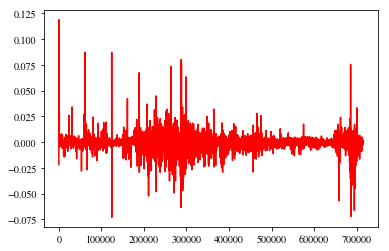

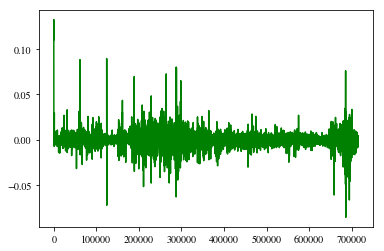

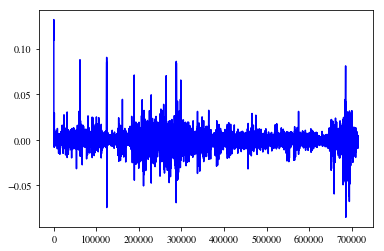

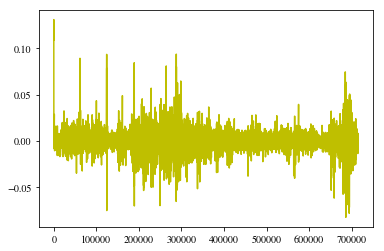

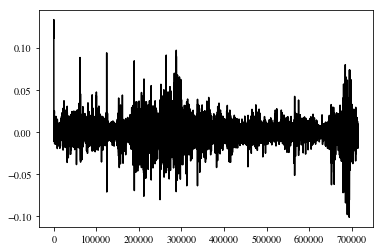

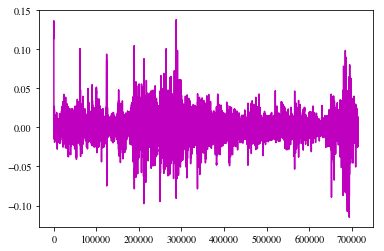

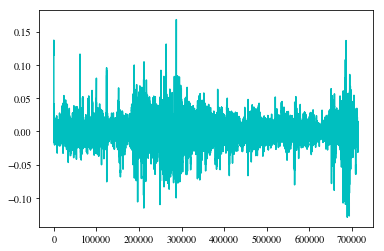

In [7]:
r_min1,r_min5,r_min10,r_min30,r_min60,r_min120,r_min240=retrun_on_teporal()

In [8]:
data_sample=[r_min1,r_min5,r_min10,r_min30,r_min60,r_min120,r_min240]

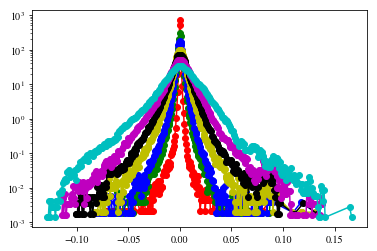

In [9]:
x_emp_list,y_emp_list=PDF(data_sample)

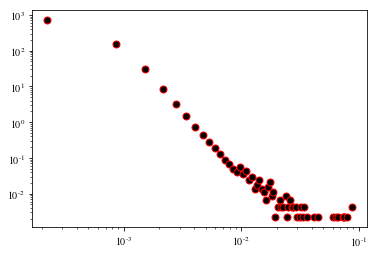

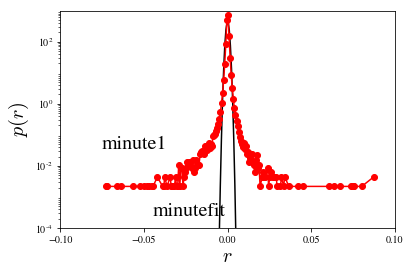

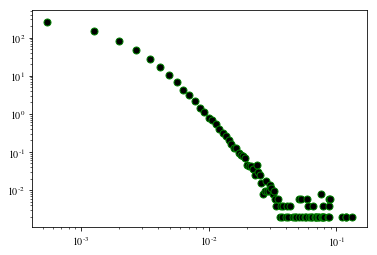

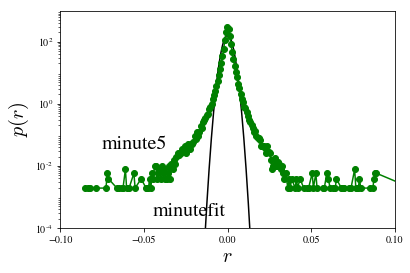

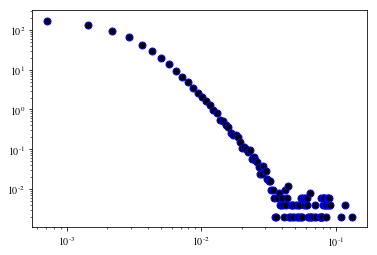

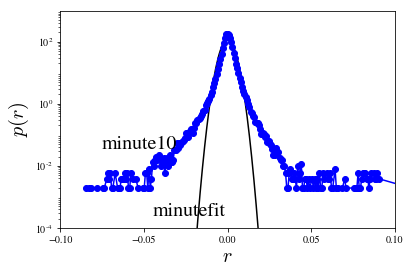

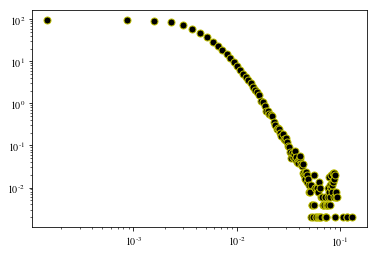

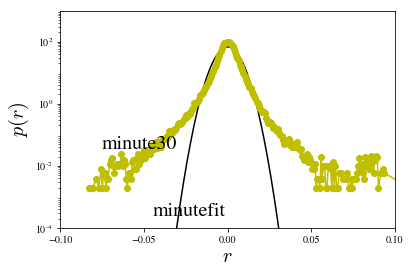

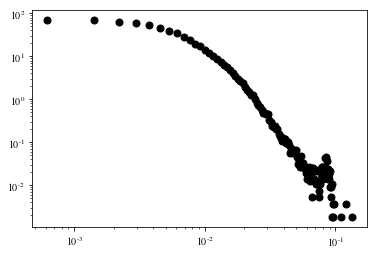

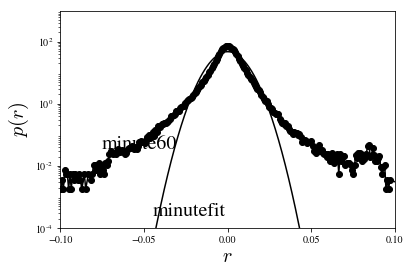

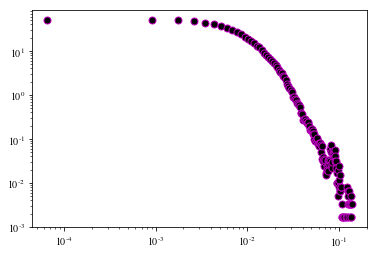

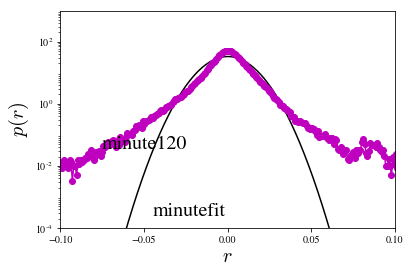

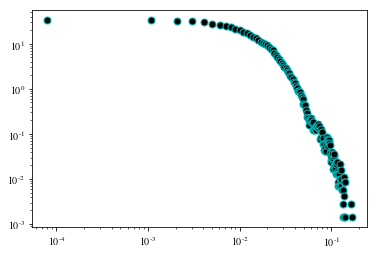

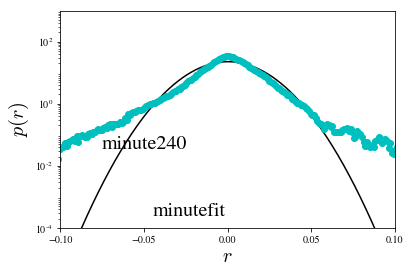

In [10]:
norm1(x_emp_list,y_emp_list,data_sample)

In [11]:
kstext(data_sample)

{0.49721411252366676: 0.0, 0.49353103621837624: 0.0, 0.49188337870008314: 0.0, 0.48804044987820183: 0.0, 0.48413889690382605: 0.0, 0.4790637017359336: 0.0, 0.472949176822106: 0.0}


{0.49721411252366676: 0.0,
 0.49353103621837624: 0.0,
 0.49188337870008314: 0.0,
 0.48804044987820183: 0.0,
 0.48413889690382605: 0.0,
 0.4790637017359336: 0.0,
 0.472949176822106: 0.0}

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
alpha: 3.1969106622063346
xmin: 0.0006799100677987724
log-likelihood ratio test: -0.18183988894484493
p-value: 0.6580750275976127


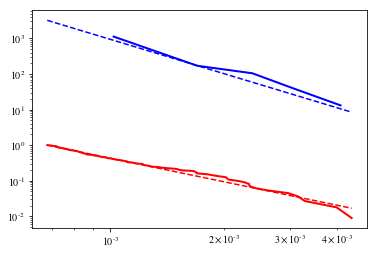

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
alpha: 2.911213526281357
xmin: 0.0019557967318606373
log-likelihood ratio test: -0.01682275616924689
p-value: 0.9483602851618111


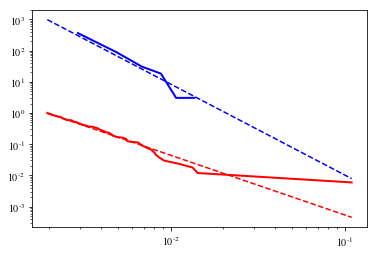

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
alpha: 3.6124025174192336
xmin: 0.004555306823647243


D:\software\anaconda\lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in true_divide
  CDF = CDF/norm
D:\software\anaconda\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
D:\software\anaconda\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
D:\software\anaconda\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


log-likelihood ratio test: -0.1525123058429958
p-value: 0.31082234483478766


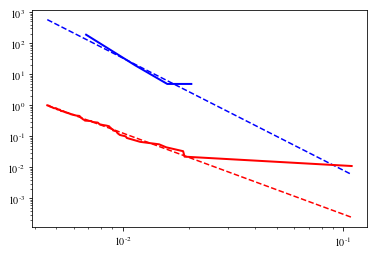

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
alpha: 2.9605767439961657
xmin: 0.004790304977094095
log-likelihood ratio test: -1.964904137961816
p-value: 0.430272021645162


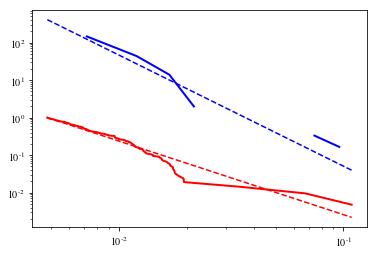

Calculating best minimal value for power law fit


D:\software\anaconda\lib\site-packages\powerlaw.py:1151: RuntimeWarning: invalid value encountered in log
  self.alpha = 1 + (self.n / sum(log(data/self.xmin)))
D:\software\anaconda\lib\site-packages\powerlaw.py:1170: RuntimeWarning: invalid value encountered in log
  return 1 + len(data)/sum(log(data / (self.xmin)))


alpha: 2.9210620954229247
xmin: 0.007630549488945704
log-likelihood ratio test: -0.8076423656183289
p-value: 0.5107125553067804


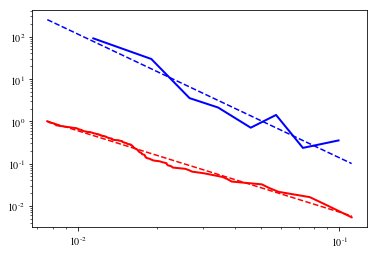

Calculating best minimal value for power law fit
alpha: 3.3235441890176585
xmin: 0.015554754485263445
log-likelihood ratio test: -0.11680072760877419
p-value: 0.7492696238810406


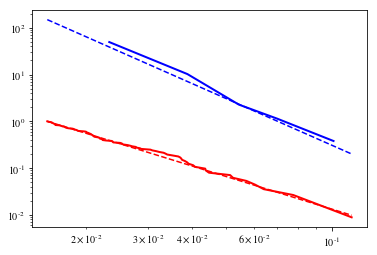

Calculating best minimal value for power law fit
alpha: 3.2736994520565004
xmin: 0.018787975812390556
log-likelihood ratio test: -0.5231400886824462
p-value: 0.5028826583558321


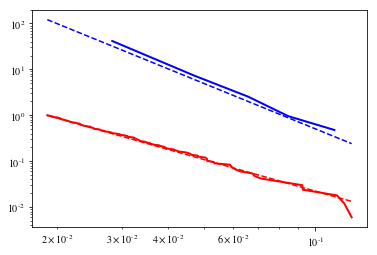

In [12]:
powerlaw1(data_sample)